In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data
censo_sinlimpiar = pd.read_csv("adult.csv")
censo_sinlimpiar.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
censo_sinlimpiar['income'].replace(to_replace='<=50K', value='0', inplace=True)
censo_sinlimpiar['income'].replace(to_replace='>50K', value='1', inplace=True)
censo_sinlimpiar['income'] = censo_sinlimpiar['income'].astype(int)

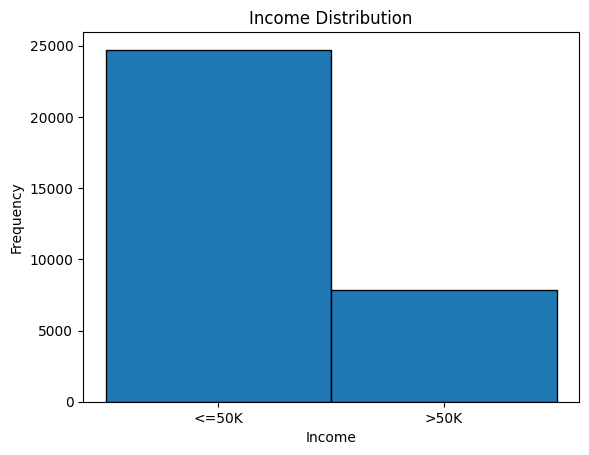

In [5]:
#Ingreso
plt.hist(censo_sinlimpiar['income'], bins=2, edgecolor='black')
plt.xticks([0.25, 0.75], ['<=50K', '>50K'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '?'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'State-gov'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Self-emp-not-inc'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Local-gov'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

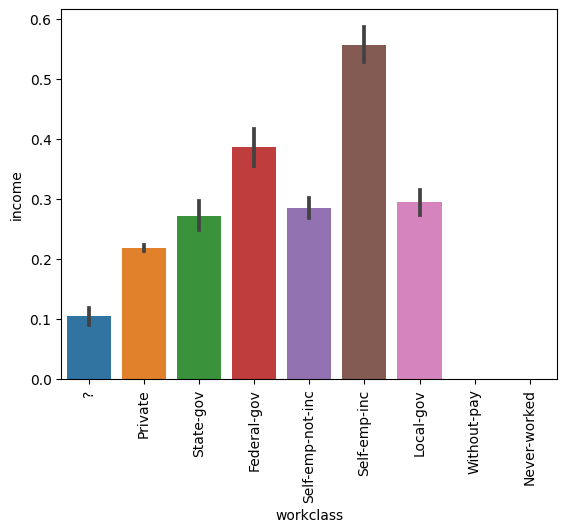

In [6]:
#Workclass
sns.barplot(x = 'workclass', y = 'income', data = censo_sinlimpiar)
plt.xticks(rotation = 90)

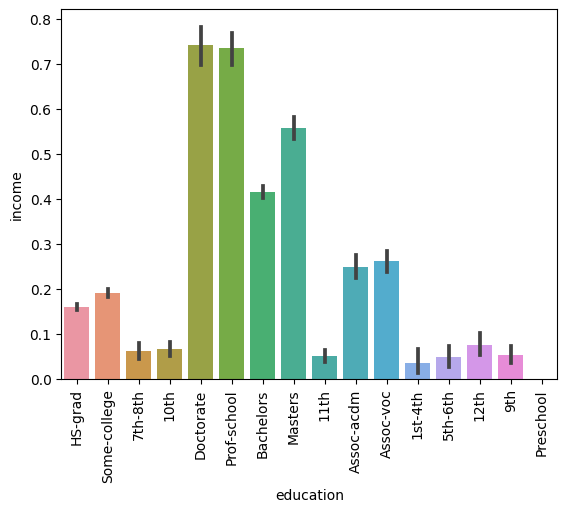

In [7]:
#Educacion
sns.barplot(x = censo_sinlimpiar['education'], y = censo_sinlimpiar['income'])
plt.xticks(rotation = 90);

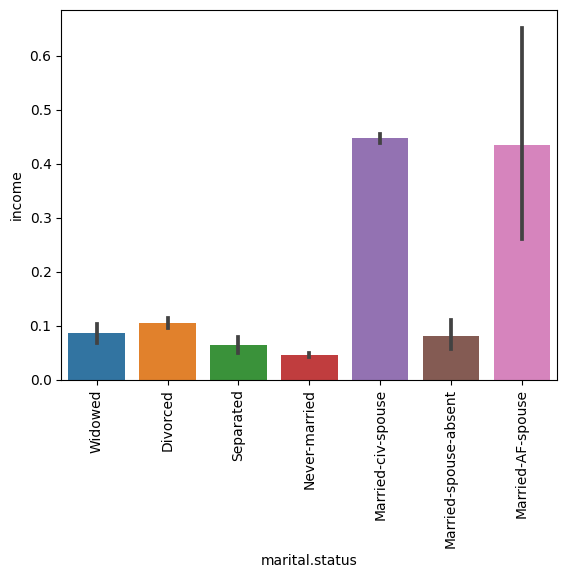

In [8]:
#Estado marital
sns.barplot(x = 'marital.status', y = 'income', data = censo_sinlimpiar)
plt.xticks(rotation = 90);

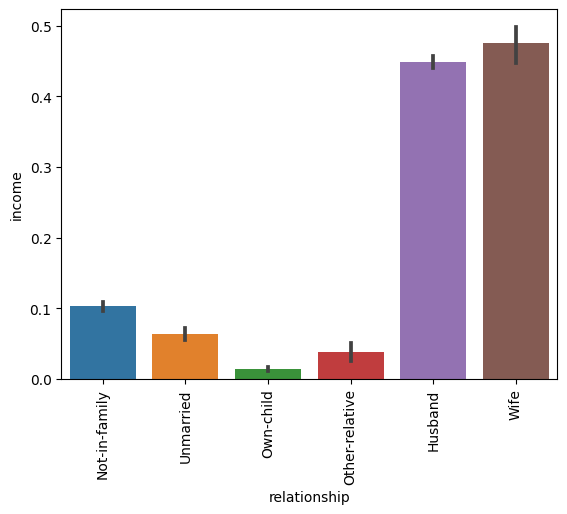

In [9]:
#Relacion
sns.barplot(x = 'relationship', y = 'income', data = censo_sinlimpiar)
plt.xticks(rotation = 90);

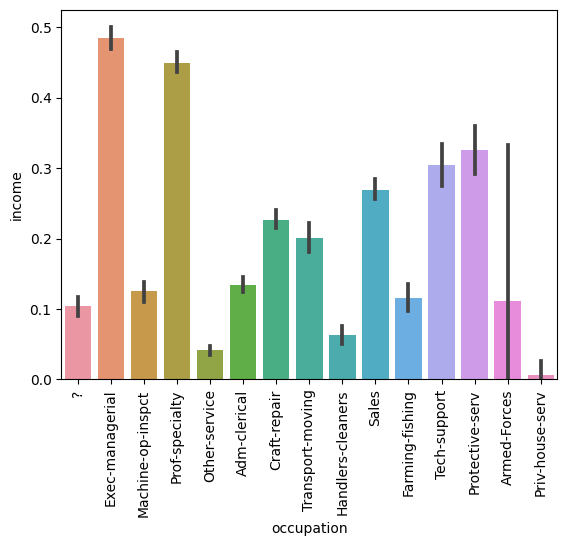

In [10]:
#Ocupacion
sns.barplot(x = 'occupation', y = 'income', data = censo_sinlimpiar)
plt.xticks(rotation = 90);

<Axes: xlabel='sex', ylabel='income'>

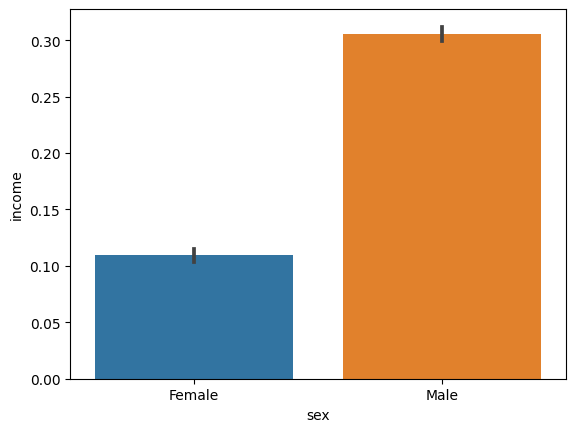

In [11]:
#Sexo
sns.barplot(x = 'sex', y = 'income', data = censo_sinlimpiar)

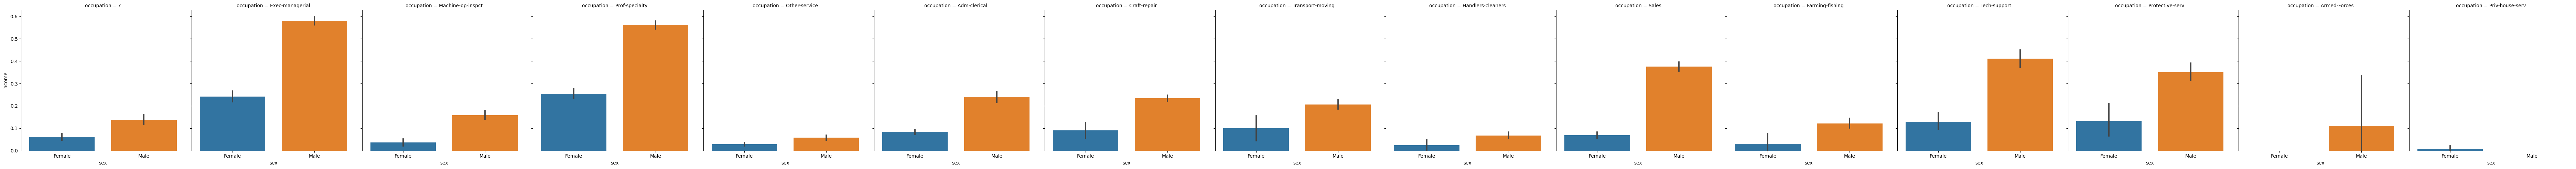

In [12]:
#Ingreso por sexo, filtrado por ocupacion
sns.catplot(x = 'sex',
            y = 'income',
            data = censo_sinlimpiar,
            kind = 'bar',
            col = 'occupation',
            height = 5, aspect = 1)

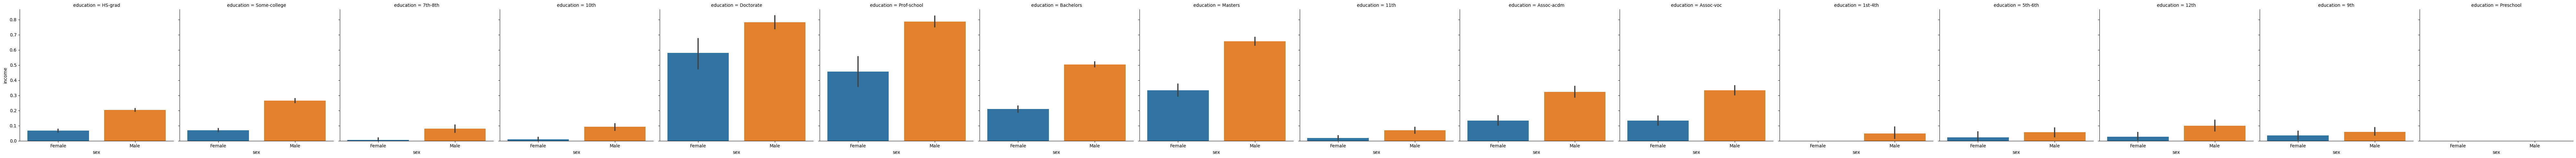

In [13]:
#Ingreso por sexo, filtrado por eduacion
sns.catplot(x = 'sex',
            y = 'income',
            data = censo_sinlimpiar,
            kind = 'bar',
            col = 'education',
            height = 5, aspect = 1)

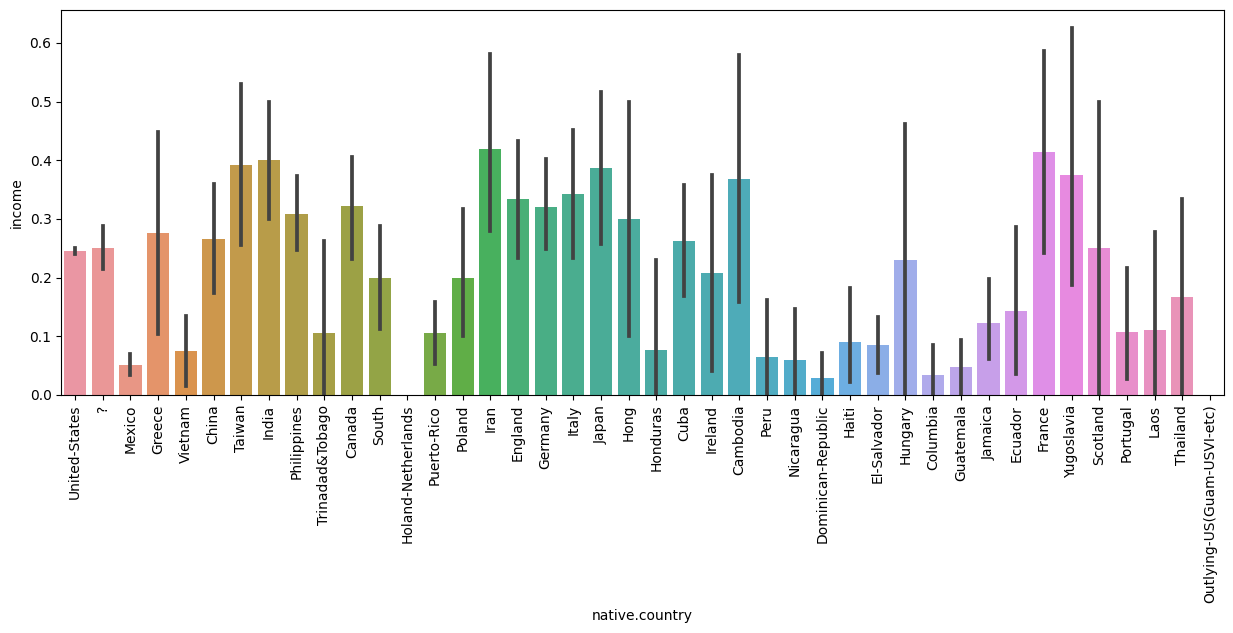

In [14]:
#Pais de origen
plt.figure(figsize = (15,5))
sns.barplot(x = 'native.country', y = 'income', data = censo_sinlimpiar)
plt.xticks(rotation = 90)
plt.show()

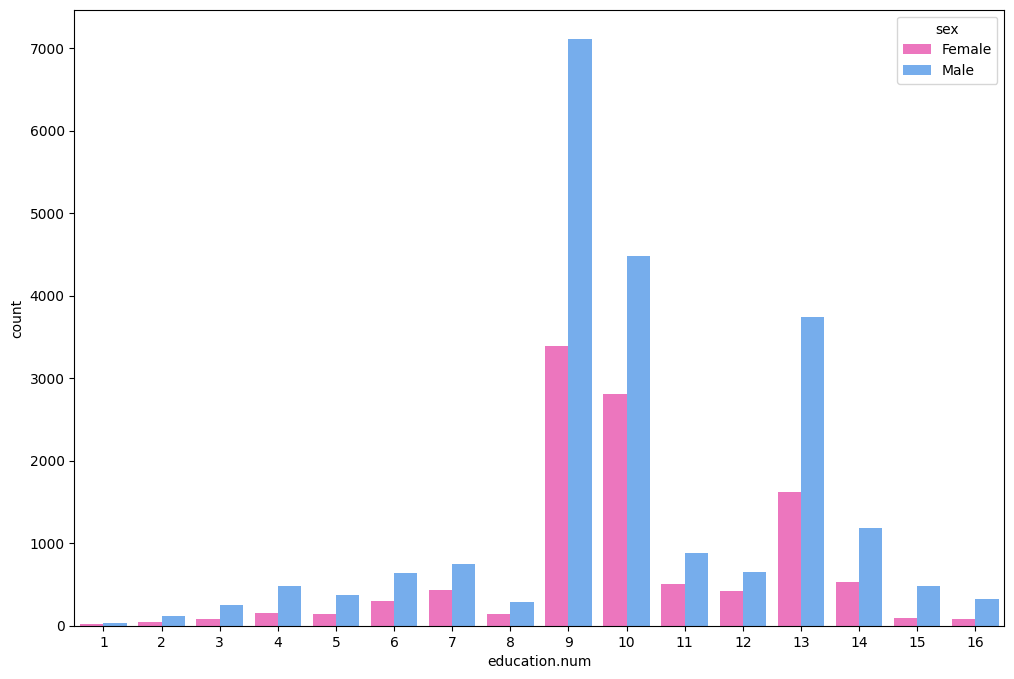

In [15]:
#educacion vs sexo
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
sex_palette = {"Male": "#63acff", "Female": "#ff63c3"}
cp = sns.countplot(x="education.num", hue="sex", data=censo_sinlimpiar, 
                   palette=sex_palette, ax=ax)

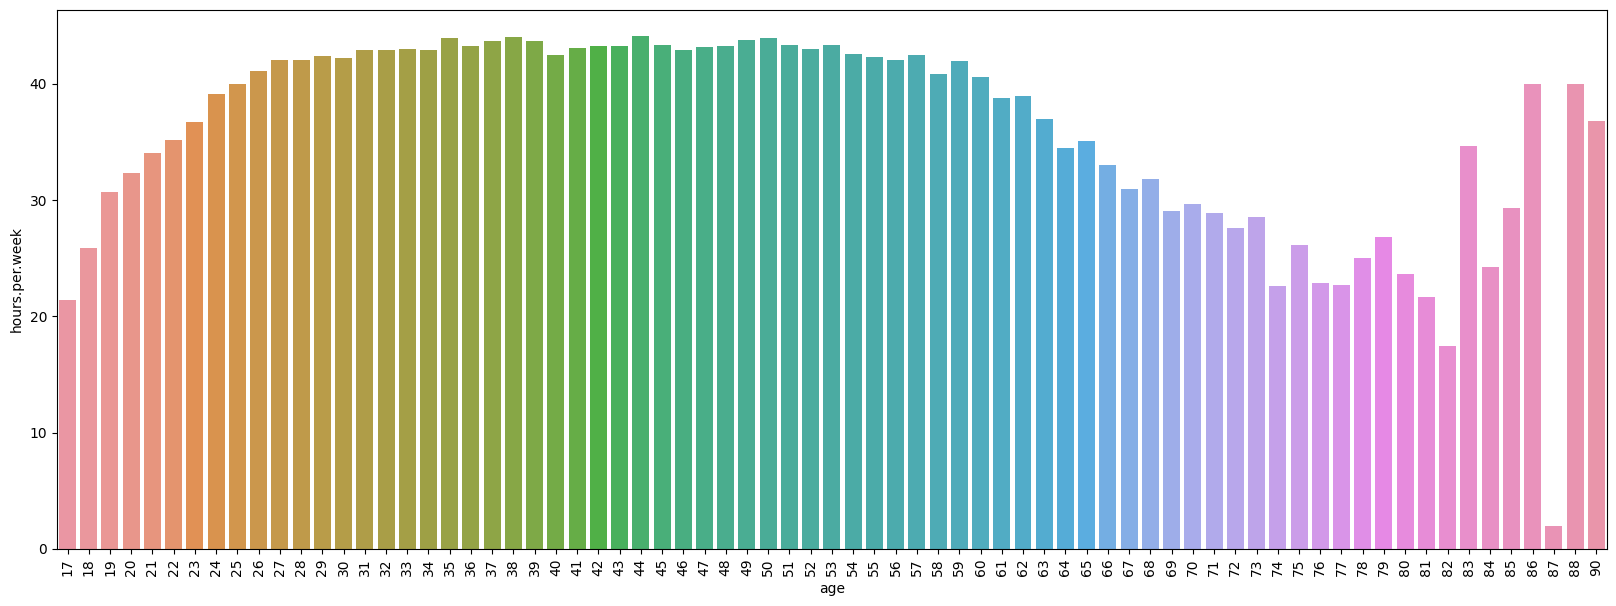

In [16]:
#age vs hours per week
plt.figure(figsize=(20, 7))
sns.barplot(x=censo_sinlimpiar['age'], y=censo_sinlimpiar['hours.per.week'], errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [17]:
#Para los datos desconocidos '?'
for col in censo_sinlimpiar.columns:
    print((col, len(censo_sinlimpiar[censo_sinlimpiar[col] == '?'])/len(censo_sinlimpiar[col])*100))

    
print("********************************************************")


#Para los datos con valor de 0
for col in censo_sinlimpiar.columns:
    print((col, len(censo_sinlimpiar[censo_sinlimpiar[col] == 0])/len(censo_sinlimpiar[col])*100))

('age', 0.0)
('workclass', 5.638647461687294)
('fnlwgt', 0.0)
('education', 0.0)
('education.num', 0.0)
('marital.status', 0.0)
('occupation', 5.660145572924664)
('relationship', 0.0)
('race', 0.0)
('sex', 0.0)
('capital.gain', 0.0)
('capital.loss', 0.0)
('hours.per.week', 0.0)
('native.country', 1.7904855501980899)
('income', 0.0)
********************************************************
('age', 0.0)
('workclass', 0.0)
('fnlwgt', 0.0)
('education', 0.0)
('education.num', 0.0)
('marital.status', 0.0)
('occupation', 0.0)
('relationship', 0.0)
('race', 0.0)
('sex', 0.0)
('capital.gain', 91.67101747489328)
('capital.loss', 95.33490986149073)
('hours.per.week', 0.0)
('native.country', 0.0)
('income', 75.91904425539757)


In [18]:
#Edad
for i in censo_sinlimpiar:
    censo_sinlimpiar.loc[(censo_sinlimpiar['age'] > 16) & (censo_sinlimpiar['age'] <= 26), 'age'] = 1
    censo_sinlimpiar.loc[(censo_sinlimpiar['age'] > 26) & (censo_sinlimpiar['age'] <= 36), 'age'] = 2
    censo_sinlimpiar.loc[(censo_sinlimpiar['age'] > 36) & (censo_sinlimpiar['age'] <= 46), 'age'] = 3
    censo_sinlimpiar.loc[(censo_sinlimpiar['age'] > 46) & (censo_sinlimpiar['age'] <= 56), 'age'] = 4
    censo_sinlimpiar.loc[censo_sinlimpiar['age'] > 56, 'age'] = 5

In [19]:
#Eduacion
censo_sinlimpiar['education'] = censo_sinlimpiar['education'].apply(lambda x: '' if x == '11th'
                                              or x == '7th-8th'
                                              or x == '10th' 
                                              or x == '5th-6th' 
                                              or x == '9th' 
                                              or x == '12th' 
                                              or x == '1st-4th' 
                                              or x == 'Preschool'
                                              else x)

censo_sinlimpiar['education'] = censo_sinlimpiar['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' 
                                              or x == 'Assoc-voc'
                                              else x)
mapeo_education = {'School': 1,
                 'HS-grad': 2,
                 'Some-college': 3,
                 'Bachelors': 4,
                 'Prof-school': 5,
                 'Associate': 6,
                 'Masters': 7,
                 'Doctorate': 8}

censo_sinlimpiar['education'] = censo_sinlimpiar['education'].map(mapeo_education)

In [20]:
#Estado marital
censo_sinlimpiar['marital.status'] = censo_sinlimpiar['marital.status'].apply(lambda x: 'Not Married' if (x == 'Widowed' 
                                                                                    or x == 'Divorced' 
                                                                                    or x == 'Separated') 
                                                                                else x)

censo_sinlimpiar['marital.status'] = censo_sinlimpiar['marital.status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse' or 
                                                                              x == 'Married-spouse-absent' 
                                                                              or x == 'Married-AF-spouse') 
                                                                            else x)

In [21]:
#Tipo de organizacion
censo_sinlimpiar['workclass'] = censo_sinlimpiar['workclass'].apply(lambda x: 'Without income' if x == 'Never-worked'
                                                                              or x == 'Without-pay'
                                                                        else x)

/var/folders/_d/3_jy8zhx5bg8hcx2hc1b_q6m0000gn/T/ipykernel_4134/1463647658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(censo_sinlimpiar.corr(), annot = True)


<Axes: >

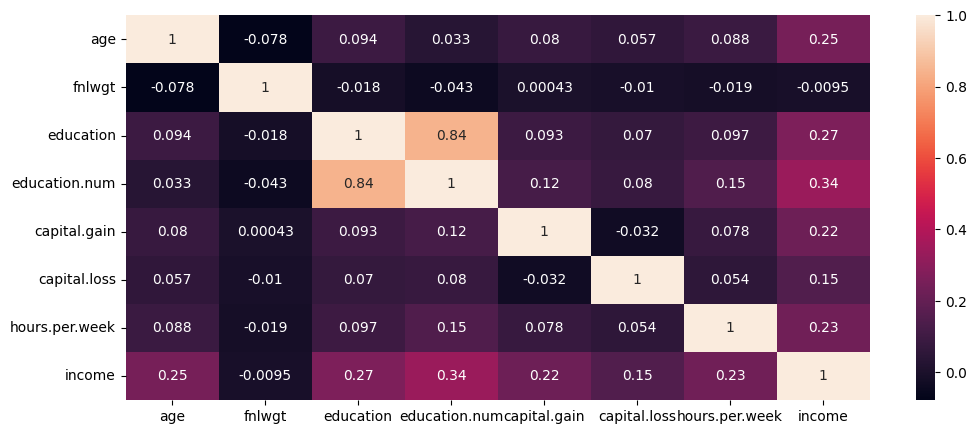

In [22]:
plt.figure(figsize = (12, 5))
sns.heatmap(censo_sinlimpiar.corr(), annot = True)

# Limpieza de datos

In [23]:
#Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
#Datos del censo a dataframe

censo = pd.read_csv('adult.csv')
censo.head(20)

#Censo limpio

censo_limpio = censo

Observaciones

Se puede notar que el dataset tiene como valores nulos o no existentes aquellos representados por un '?' o signo e interrogración. Por otra parte, la ganancia capital aparenta estar en 0 para numerosos registros. Se procederá a observar los valores de las columnas del dataset.

In [25]:
#Columna workclass

print(censo['workclass'].value_counts())

#Para esta columna se decide poner el valor mas común dentro de data set, siendo este el valor 'Private'

censo_limpio['workclass'] = censo_limpio['workclass'].replace('?', 'Private')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [26]:
#Columna education

print(censo['education'].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [27]:
#Columna marital.status

print(censo['marital.status'].value_counts())

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


In [28]:
#Columna occupation

print(censo['occupation'].value_counts())

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [29]:
#Para la ocupación, se considera reemplazar las ocupaciones desconocidas acorde a su formación académica. 
#Por otra parte se asignan las ocupaciones en relación a lo observado en el análisis exploratorio.

HS_grad_occupation = ['Craft-repair', 'Adm-clerical', 'Other-service', 'Machine-op-inspct']
Some_college_occupation = ['Craft-repair', 'Adm-clerical', 'Other-service', 'Exec-managerial']
Bachelors_occupation = ['Prof-specialty', 'Exec-managerial', 'Sales']
Assoc_acdm_occupation = ['Adm-clerical', 'Sales', 'Prof-specialty', 'Craft-repair', 'Exec-managerial']
Assoc_voc_occupation = ['Adm-clerical', 'Prof-specialty', 'Craft-repair']
tenth_occupation = ['Craft-repair', 'Sales', 'Other-service']
seventh_occupation = ['Craft-repair', 'Farming-fishing', 'Machine-op-inspct', 'Priv-house-serv', 'Protective-serv']

for index in range(len(censo_limpio)):
    if censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'HS-grad':
        censo_limpio.loc[index, 'occupation'] = random.choice(HS_grad_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Some-college':
        censo_limpio.loc[index, 'occupation'] = random.choice(Some_college_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Bachelors':
        censo_limpio.loc[index, 'occupation'] = random.choice(Bachelors_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Masters':
        censo_limpio.loc[index, 'occupation'] = random.choice(Bachelors_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Assoc-acdm':
        censo_limpio.loc[index, 'occupation'] = random.choice(Assoc_acdm_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Assoc-voc':
        censo_limpio.loc[index, 'occupation'] = random.choice(Assoc_voc_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '10th':
        censo_limpio.loc[index, 'occupation'] = random.choice(tenth_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '7th-8th':
        censo_limpio.loc[index, 'occupation'] = random.choice(seventh_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Prof-school':
        censo_limpio.loc[index, 'occupation'] = random.choice(Bachelors_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '9th':
        censo_limpio.loc[index, 'occupation'] = random.choice(tenth_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '12th':
        censo_limpio.loc[index, 'occupation'] = random.choice(HS_grad_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Doctorate':
        censo_limpio.loc[index, 'occupation'] = random.choice(HS_grad_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '5th-6th':
        censo_limpio.loc[index, 'occupation'] = random.choice(seventh_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '1st-4th':
        censo_limpio.loc[index, 'occupation'] = random.choice(seventh_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == 'Preschool':
        censo_limpio.loc[index, 'occupation'] = random.choice(seventh_occupation)
    elif censo_limpio.loc[index, 'occupation'] == '?' and censo_limpio.loc[index, 'education'] == '11th':
        censo_limpio.loc[index, 'occupation'] = random.choice(HS_grad_occupation)

print(censo_limpio['occupation'].value_counts())

Craft-repair         4504
Exec-managerial      4290
Prof-specialty       4254
Adm-clerical         4107
Sales                3798
Other-service        3640
Machine-op-inspct    2198
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing      1019
Tech-support          928
Protective-serv       681
Priv-house-serv       166
Armed-Forces            9
Name: occupation, dtype: int64


In [30]:
#Columna relationship

print(censo['relationship'].value_counts())

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [31]:
#Columna race

print(censo['race'].value_counts())

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [32]:
#Columna sex

print(censo['sex'].value_counts())

Male      21790
Female    10771
Name: sex, dtype: int64


In [33]:
#Columna capital.gain

print(censo['capital.gain'].value_counts())

#Descripcion de la columna 
censo['capital.gain'].describe()

#Agrupamos la ganancia capital por educacion y sacamos su promedio
media_educacion = censo_limpio.groupby('education')['capital.gain'].mean()
print(media_educacion)

#Sustituimos los valores por sus promedios

for index in range(len(censo_limpio)):
    if censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'HS-grad':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['HS-grad']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Some-college':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Some-college']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Bachelors':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Bachelors']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Masters':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Masters']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Assoc-acdm':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Assoc-acdm']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Assoc-voc':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Assoc-voc']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '10th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['10th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '7th-8th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['7th-8th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Prof-school':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Prof-school']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '9th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['9th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '12th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['12th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Doctorate':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Doctorate']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '5th-6th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['5th-6th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '1st-4th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['1st-4th']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == 'Preschool':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['Preschool']
    elif censo_limpio.loc[index, 'capital.gain'] == 0 and censo_limpio.loc[index, 'education'] == '11th':
        censo_limpio.loc[index, 'capital.gain'] = media_educacion['HS-grad']

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64
education
10th              404.574491
11th              215.097872
12th              284.087760
1st-4th           125.875000
5th-6th           176.021021
7th-8th           233.939628
9th               342.089494
Assoc-acdm        640.399250
Assoc-voc         715.051375
Bachelors        1756.299533
Doctorate        4770.145278
HS-grad           576.800114
Masters          2562.563552
Preschool         898.392157
Prof-school     10414.416667
Some-college      598.824167
Name: capital.gain, dtype: float64


In [34]:
#Columna capital.loss

print(censo['capital.loss'].value_counts())

#Descripcion de la columna 
censo['capital.loss'].describe()

#Agrupamos la ganancia capital por educacion y sacamos su promedio
media_loss_educacion = censo_limpio.groupby('education')['capital.loss'].mean()
print(media_loss_educacion)

#Sustituimos los valores por sus promedios
for index in range(len(censo_limpio)):
    if censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'HS-grad':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['HS-grad']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Some-college':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Some-college']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Bachelors':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Bachelors']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Masters':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Masters']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Assoc-acdm':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Assoc-acdm']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Assoc-voc':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Assoc-voc']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '10th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['10th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '7th-8th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['7th-8th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Prof-school':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Prof-school']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '9th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['9th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '12th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['12th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Doctorate':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Doctorate']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '5th-6th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['5th-6th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '1st-4th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['1st-4th']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == 'Preschool':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['Preschool']
    elif censo_limpio.loc[index, 'capital.loss'] == 0 and censo_limpio.loc[index, 'education'] == '11th':
        censo_limpio.loc[index, 'capital.loss'] = media_loss_educacion['HS-grad']

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64
education
10th             56.845659
11th             50.079149
12th             32.337182
1st-4th          48.327381
5th-6th          68.252252
7th-8th          65.668731
9th              28.998054
Assoc-acdm       93.418932
Assoc-voc        72.754703
Bachelors       118.350327
Doctorate       262.845036
HS-grad          70.466622
Masters         166.719675
Preschool        66.490196
Prof-school     231.203125
Some-college     71.637087
Name: capital.loss, dtype: float64


In [35]:
#Columna hours.per.week

print(censo['hours.per.week'].value_counts())

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 94, dtype: int64


In [36]:
#Columna native.country

print(censo['native.country'].value_counts())

#Usaremos el valor mas comun, en este caso 'United-States'
censo_limpio['native.country'] = censo_limpio['native.country'].replace('?', 'United-States')

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [37]:
#Columna income

print(censo['income'].value_counts())

<=50K    24720
>50K      7841
Name: income, dtype: int64


# MODELADO

In [38]:
# Importamos la libreria de sklearn para dividir el dataset
from sklearn.model_selection import train_test_split

In [39]:
#Modificamos la columna income para que sea numerica
censo['income'] = censo['income'].replace('<=50K', 0)
censo['income'] = censo['income'].replace('>50K', 1)

#Show Data
censo.head(10)
censo.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,598.824167,71.637087,50,United-States,0
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,404.574491,56.845659,40,United-States,0
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,715.051375,72.754703,45,United-States,0
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,2562.563552,166.719675,11,Taiwan,0
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,2562.563552,166.719675,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,598.824167,71.637087,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,640.399250,93.418932,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,576.800114,70.466622,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,576.800114,70.466622,40,United-States,0
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,576.800114,70.466622,20,United-States,0


In [40]:

X = censo.drop("income", axis=1)
y = censo["income"]

#Dividimos el dataset en train y test
# Random_state divide los conjuntos de datos de prueba y entrenamiento de forma aleatoria.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)



In [41]:
# Importar bibliotecas necesarias de sklearn
# La biblioteca sklearn de Python nos ofrece la función StandardScaler() para estandarizar los valores de los datos en un formato estándar.
# La biblioteca sklearn de Python nos ofrece la función OneHotEncoder() para codificar las variables categóricas en un formato numérico.
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# La biblioteca sklearn de Python nos ofrece la función ColumnTransformer() para aplicar las transformaciones apropiadas a características numéricas y categóricas.
from sklearn.compose import ColumnTransformer

# Seleccionar características numéricas (tipos de datos int64 y float64) del conjunto de datos
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns

# Seleccionar características categóricas (tipos de datos object) del conjunto de datos
categorical_features = X.select_dtypes(include=["object"]).columns

# Definir una instancia de StandardScaler para escalar características numéricas
numeric_transformer = StandardScaler()

# Definir una instancia de OneHotEncoder para codificar características categóricas
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Definir una instancia de ColumnTransformer para aplicar las transformaciones apropiadas a características numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("Numerico", numeric_transformer, numeric_features),
        ("categorico", categorical_transformer, categorical_features)
    ])


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Definir una instancia de Pipeline para aplicar las transformaciones apropiadas a características numéricas y categóricas y entrenar un modelo de árbol de decisión
clf_decision_tree = Pipeline(steps=[("preprocessor", preprocessor),
                                    ("classifier", DecisionTreeClassifier())])

# Entrenar el modelo usando los datos de entrenamiento (X_train, y_train)
clf_decision_tree.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerico', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('categorico',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [50]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_decision_tree = clf_decision_tree.predict(X_test)

print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_decision_tree)))
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7473
           1       0.60      0.63      0.62      2296

    accuracy                           0.82      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train_preprocessed, y_train)



RandomForestClassifier()

In [45]:
y_pred_random_forest = clf_random_forest.predict(X_test_preprocessed)

print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_random_forest)))
print(classification_report(y_test, y_pred_random_forest))


Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7473
           1       0.71      0.62      0.66      2296

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [52]:
# Input data
age = 35
hours_per_week = 40
education_num = 14
relationship = "Husband"
marital_status = "Married-civ-spouse"
fnlwgt = censo.loc[censo['age'] == age]['fnlwgt'].mean()
workclass = "Private" 
education = "Bachelors" 
occupation = "Exec-managerial" 
race = "White" 
sex = "Female"  
capital_gain = 500 
capital_loss = 100
native_country = "United-States" 

# Create a DataFrame with the input data
sample_data = pd.DataFrame(
    [[age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country]],
    columns=["age", "workclass", "fnlwgt", "education", "education.num", "marital.status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours.per.week", "native.country"],
)

# Preprocess the input data
sample_data_preprocessed = preprocessor.transform(sample_data)

# Make a prediction using the random forest model
pred = clf_random_forest.predict(sample_data_preprocessed)

# Interpret the prediction
if pred[0] == 0:
    result = "<=50K"
else:
    result = ">50K"

print("Predicted salary:", result)

Predicted salary: >50K
